In [392]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from datetime import datetime
import pandas_profiling
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import seasonal_decompose

register_matplotlib_converters()
plt.style.use('fivethirtyeight')

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9 #Changes default matplotlib plots to this size

In [2]:
PATH1 = './dump_ec.csv'
PATH2 = './dump_tmp.csv'

In [491]:
load_data = pd.read_csv(PATH1)
timestamp = []

for row in tqdm(load_data.timestamp.tolist()):

    tstamp = datetime.strptime(row,'%d/%b/%Y %H:%M:%S')
    timestamp.append(tstamp)
    
load_data['timestamp'] = timestamp

load_data.set_index('timestamp',inplace=True)
load_data.index = pd.to_datetime(load_data.index, format='%Y-%m-%d %H:%M:%S')

load_data = load_data[load_data.index >= '2014-11-01 00:00:00']
load_data = load_data[load_data.index <= '2016-05-26 20:15:00']
load_data.columns = ['load']

date_range = pd.date_range('2014-11-01 00:00:00', '2016-05-26 20:15:00', freq='15Min')
missing_df = pd.DataFrame(np.random.randint(1, 20, (date_range.shape[0], 1)))
missing_df.index = date_range  

print(len(missing_df[~missing_df.index.isin(load_data.index)])/len(missing_df))


0.16796377786667638


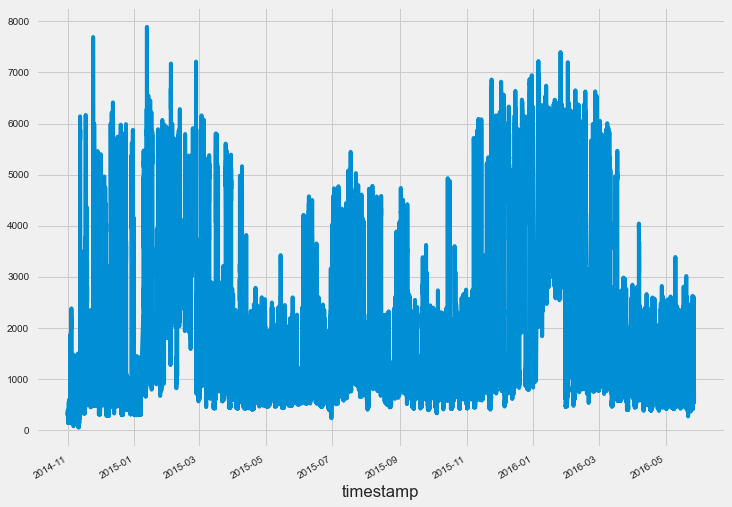

In [492]:
load_data.load.plot()

In [493]:
missing_df

,0
2014-11-01 00:00:00,18
2014-11-01 00:15:00,14
2014-11-01 00:30:00,4
2014-11-01 00:45:00,5
2014-11-01 01:00:00,12
...,...
2016-05-26 19:15:00,3
2016-05-26 19:30:00,19
2016-05-26 19:45:00,5
2016-05-26 20:00:00,12


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef2366d1d0>]],
      dtype=object)

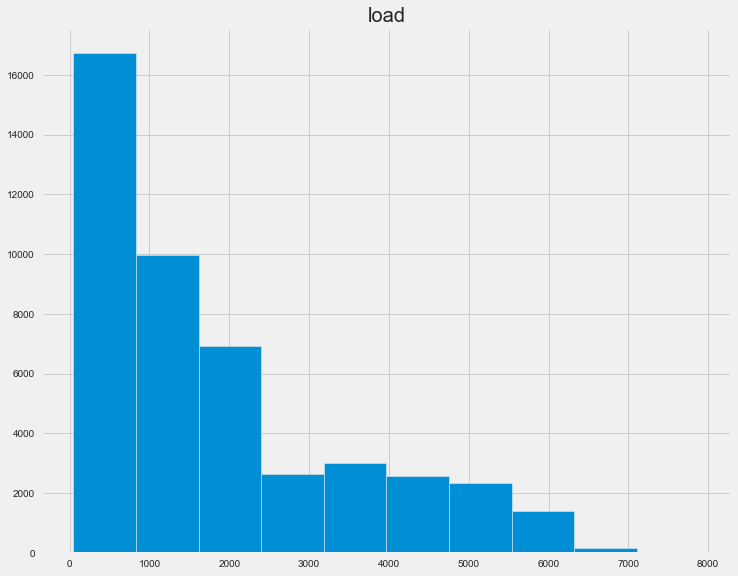

In [494]:
load_data.hist()

In [495]:
load_data

,load
timestamp,
2014-11-01 00:00:00,280.6
2014-11-01 00:15:00,353.5
2014-11-01 00:30:00,327.1
2014-11-01 00:45:00,336.4
2014-11-01 01:00:00,341.1
...,...
2016-05-26 19:15:00,1821.8
2016-05-26 19:30:00,1581.5
2016-05-26 19:45:00,784.5


In [496]:
df = pd.concat([missing_df, load_data], axis=1)
df.drop([0], axis=1, inplace=True)
df['leak'] = df.isna().load.tolist()

In [502]:
pandas_profiling.ProfileReport(df)

In [497]:
final, id_ = [], []
for i,(index,row) in enumerate(tqdm(df.iterrows())):
    if row.leak == True:
        lookupDate = index - pd.Timedelta(7, 'days')
        impute = df[df.index == lookupDate]
        try:
            final.append(impute.load.values[0])
        except:
            id_.append(i)
            final.append('nil')
    else:
        final.append(row.load)
        
print(len(id_))
if len(df) == len(final):
    df['final'] = final



12


In [498]:
df.drop(['load', 'leak'], axis=1, inplace=True)
df = df[ df.index > '2014-11-07 23:45:00' ]
df.columns = ['load']

In [499]:
df['leak'] = df.isna().load.tolist()

In [500]:
final, id_ = [], []
for i,(index,row) in enumerate(tqdm(df.iterrows())):
    if row.leak == True:
        lookupDate = index - pd.Timedelta(7, 'days')
        impute = df[df.index == lookupDate]
        try:
            final.append(impute.load.values[0])
        except:
            id_.append(i)
            final.append()
    else:
        final.append(row.load)
        
print(len(id_))
if len(df) == len(final):
    df['final'] = final



0


In [501]:
df.drop(['load', 'leak'], axis=1, inplace=True)
df.columns = ['load']

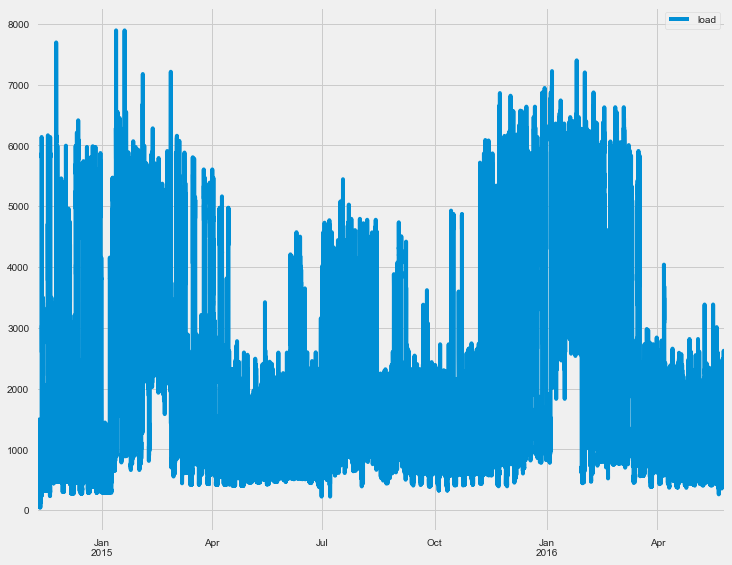

In [443]:
# df.to_csv('data_final.csv')
df.plot()

In [431]:
df.iloc[500:510]

,load
2014-11-13 05:00:00,6.285067
2014-11-13 05:15:00,6.219198
2014-11-13 05:30:00,6.316262
2014-11-13 05:45:00,6.264540
2014-11-13 06:00:00,6.365439
2014-11-13 06:15:00,6.302253
2014-11-13 06:30:00,6.302253
2014-11-13 06:45:00,6.391750
2014-11-13 07:00:00,6.206778
2014-11-13 07:15:00,6.582717


In [446]:
df.load = df['load'].apply(np.log)

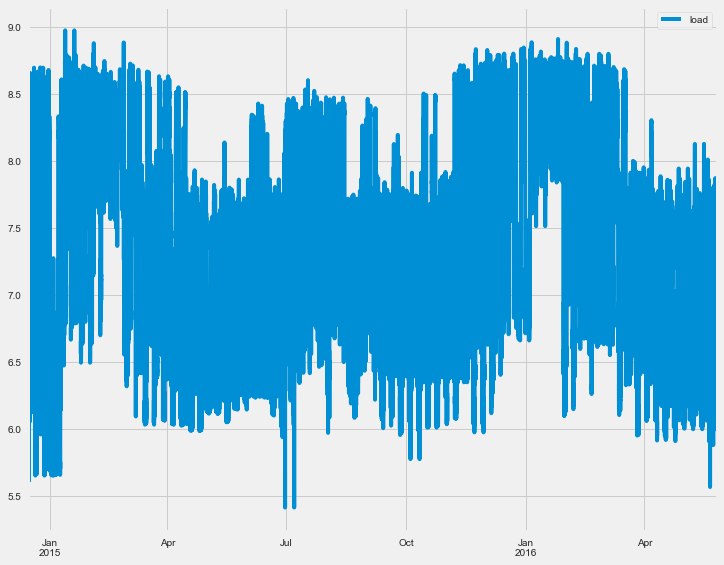

In [448]:

df[df.index >= '2014-12-15 00:00:00'].plot()

In [449]:
df[df.index >= "2015-02-08 00:15:00"]

,load
2015-02-08 00:15:00,7.979168
2015-02-08 00:30:00,7.834274
2015-02-08 00:45:00,8.050895
2015-02-08 01:00:00,7.972776
2015-02-08 01:15:00,8.003296
...,...
2016-05-26 19:15:00,7.507580
2016-05-26 19:30:00,7.366129
2016-05-26 19:45:00,6.665047
2016-05-26 20:00:00,6.293604


In [450]:
temp_data = pd.read_csv(PATH2)
timestamp = []

for row in tqdm(temp_data.timestamp.tolist()):

    tstamp = datetime.strptime(row,'%d/%b/%Y %H:%M:%S')
    timestamp.append(tstamp)
    
temp_data['timestamp'] = timestamp

temp_data.set_index('timestamp',inplace=True)
temp_data.index = pd.to_datetime(temp_data.index, format='%Y-%m-%d %H:%M:%S')
temp_data = temp_data.resample(rule='15min').mean()
temp_data = temp_data.asfreq('15min')
temp_data = temp_data.interpolate(method='polynomial', order=3)
temp_data = temp_data[temp_data.index >= '2014-11-08 00:00:00']
temp_data = temp_data[temp_data.index <= '2016-05-26 20:15:00']

In [451]:
# pandas_profiling.ProfileReport(df)
df_final = pd.concat([df,temp_data], axis=1)
df_final

,load,temp
2014-11-08 00:00:00,5.636930,16.789068
2014-11-08 00:15:00,5.867883,17.000000
2014-11-08 00:30:00,5.790266,16.966991
2014-11-08 00:45:00,5.818301,17.000000
2014-11-08 01:00:00,5.832176,17.467966
...,...,...
2016-05-26 19:15:00,7.507580,24.000000
2016-05-26 19:30:00,7.366129,23.972910
2016-05-26 19:45:00,6.665047,24.000000
2016-05-26 20:00:00,6.293604,24.142101


In [455]:
pandas_profiling.ProfileReport(df_final)

In [452]:
is_holiday = [0]*len(df)
weekend = ['Saturday', 'Sunday']

for i, date in tqdm(enumerate(df_final.index.tolist())):
    day, month, day_name = date.day, date.month, date.day_name()
    holidays = [
        (day==1  and month==1),
        (day==6  and month==1),
        (day==21 and month==4),
        (day==25 and month==4),
        (day==1  and month==5),
        (day==2  and month==6),
        (day==15 and month==8),
        (day==1  and month==11),
        (day==8  and month==12),
        (day==25 and month==12),
        (day==26 and month==12),
        (day_name in weekend)
    ]
#     print(holidays)
    if any(holidays):
        is_holiday[i] = 1
        
df_final['holiday'] = is_holiday

In [420]:
# df_final.load = df_final['load'].apply(np.log)

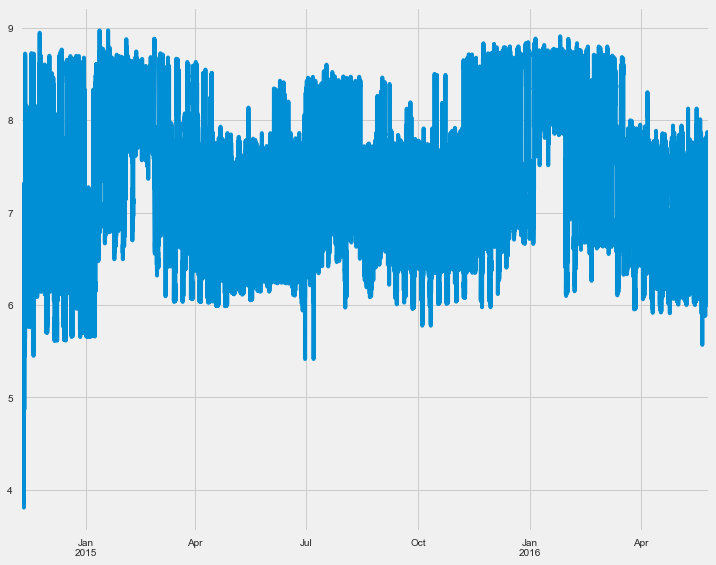

In [453]:
df_final.load.plot()

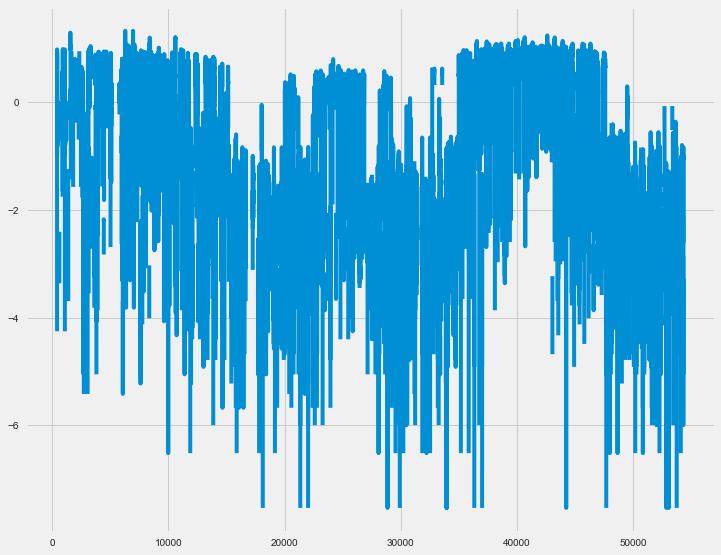

In [409]:
df_final.load.plot()

## df_final.load.mean()

In [364]:
df_final.columns = ['load', 'temp', 'holiday']

In [365]:
df_final.describe()

,load,temp,holiday
count,54322.000000,54322.000000,54322.000000
mean,1906.251386,16.819666,0.311034
std,1583.826293,7.687806,0.462921
min,45.000000,-2.000000,0.000000
25%,677.600000,11.000000,0.000000
50%,1197.750000,16.000000,0.000000
75%,2728.425000,22.000000,1.000000
max,7893.400000,42.223141,1.000000


In [366]:
df_final.load = (df_final.load - df_final.load.mean())/ df_final.load.std()
df_final.temp = (df_final.temp - df_final.temp.mean())/ df_final.temp.std()
df_final

,load,temp,holiday
2014-11-08 00:00:00,-1.026408,-0.003980,1
2014-11-08 00:15:00,-0.980380,0.023457,1
2014-11-08 00:30:00,-0.997048,0.019164,1
2014-11-08 00:45:00,-0.991176,0.023457,1
2014-11-08 01:00:00,-0.988209,0.084328,1
...,...,...,...
2016-05-26 19:15:00,-0.053321,0.933990,0
2016-05-26 19:30:00,-0.205042,0.930466,0
2016-05-26 19:45:00,-0.708254,0.933990,0
2016-05-26 20:00:00,-0.861933,0.952474,0


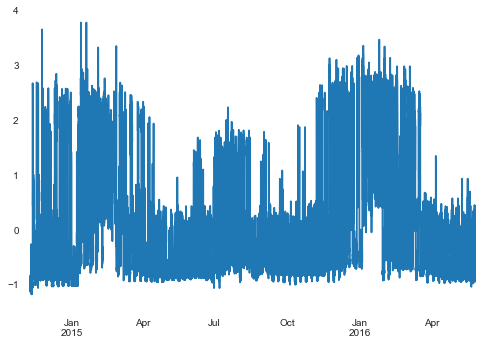

In [367]:
df_final.load.plot()

In [382]:
# df_final['dow'] = df_final.index.dayofweek
# df_final['hour'] = df_final.index.hour
df_final['dow_sin'] = np.round(np.sin((df_final.index.dayofweek)*(2.*np.pi/12)), 15)
df_final['dow_cos'] = np.round(np.cos((df_final.index.dayofweek)*(2.*np.pi/12)), 15)
df_final['hr_sin'] = np.round(np.sin((df_final.index.hour)*(2.*np.pi/12)), 15)
df_final['hr_cos'] = np.round(np.cos((df_final.index.hour)*(2.*np.pi/12)), 15)


In [457]:
df['dow'] = df.index.dayofweek
df['doy'] = df.index.dayofyear
df['year'] = df.index.year
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['woy'] = df.index.weekofyear
df['dom'] = df.index.day # Day of Month
df['date'] = df.index.date 

In [464]:
df

,load,dow,doy,year,month,quarter,hour,woy,dom
2014-11-08 00:00:00,5.636930,5,312,2014,11,4,0,45,8
2014-11-08 00:15:00,5.867883,5,312,2014,11,4,0,45,8
2014-11-08 00:30:00,5.790266,5,312,2014,11,4,0,45,8
2014-11-08 00:45:00,5.818301,5,312,2014,11,4,0,45,8
2014-11-08 01:00:00,5.832176,5,312,2014,11,4,1,45,8
...,...,...,...,...,...,...,...,...,...
2016-05-26 19:15:00,7.507580,3,147,2016,5,2,19,21,26
2016-05-26 19:30:00,7.366129,3,147,2016,5,2,19,21,26
2016-05-26 19:45:00,6.665047,3,147,2016,5,2,19,21,26
2016-05-26 20:00:00,6.293604,3,147,2016,5,2,20,21,26


In [461]:
df.drop(['weekday', 'date'], axis=1, inplace=True)

In [462]:
df_final.phik_matrix()

# The combined features of PhiK form an advantage over existing coefficients. 
# First, it works consistently between categorical, ordinal and interval variables. 
# Second, it captures non-linear dependency. 
# Third, it reverts to the Pearson correlation coefficient in case of a bi-variate normal input distribution. 

interval columns not set, guessing: ['load', ' temp', 'holiday']


,load,temp,holiday
load,1.000000,0.44784,0.587555
temp,0.447840,1.00000,0.063930
holiday,0.587555,0.06393,1.000000


In [463]:
pandas_profiling.ProfileReport(df_final)

In [377]:
df_final

,load,temp,holiday,dow,hour
2014-11-08 00:00:00,-1.026408,-0.003980,1,5,0
2014-11-08 00:15:00,-0.980380,0.023457,1,5,0
2014-11-08 00:30:00,-0.997048,0.019164,1,5,0
2014-11-08 00:45:00,-0.991176,0.023457,1,5,0
2014-11-08 01:00:00,-0.988209,0.084328,1,5,1
...,...,...,...,...,...
2016-05-26 19:15:00,-0.053321,0.933990,0,3,19
2016-05-26 19:30:00,-0.205042,0.930466,0,3,19
2016-05-26 19:45:00,-0.708254,0.933990,0,3,19
2016-05-26 20:00:00,-0.861933,0.952474,0,3,20


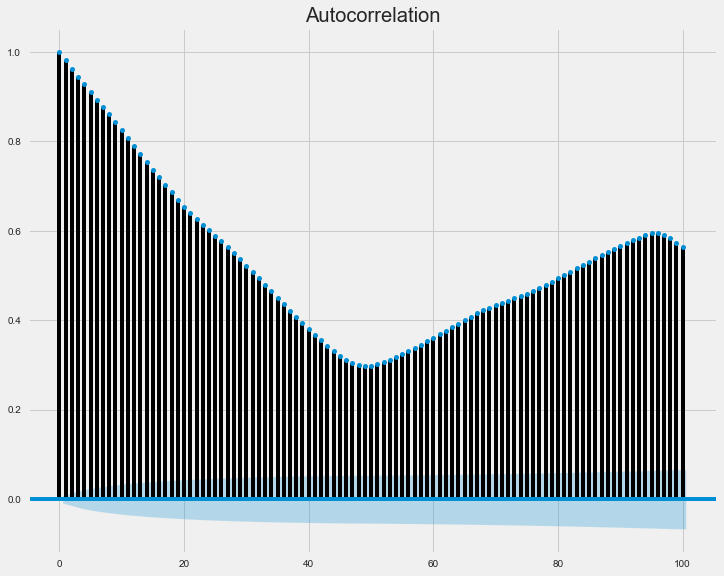

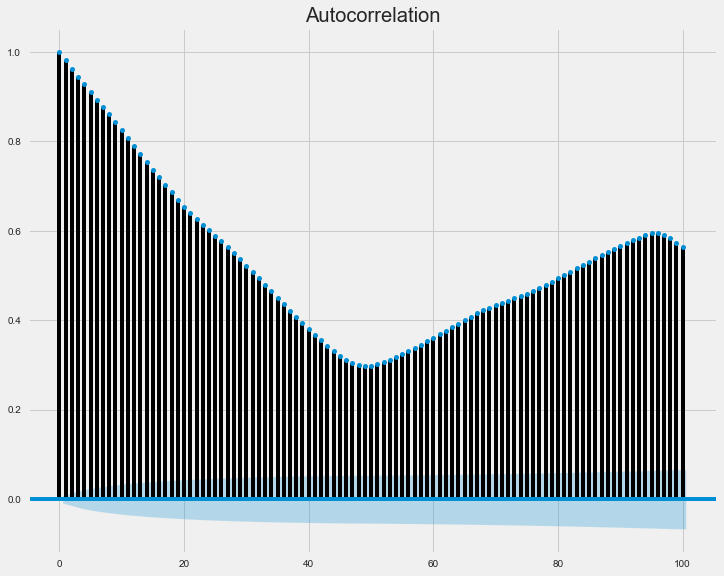

In [503]:
plot_acf(df_final.load, lags=100)

In [399]:
df_final.reset_index(drop=True, inplace=True)

# Uncomment the next line to save the dataset to the working directory
df_final.to_csv('./data_log_final.csv', index=False)


In [465]:
df

,load,dow,doy,year,month,quarter,hour,woy,dom
2014-11-08 00:00:00,5.636930,5,312,2014,11,4,0,45,8
2014-11-08 00:15:00,5.867883,5,312,2014,11,4,0,45,8
2014-11-08 00:30:00,5.790266,5,312,2014,11,4,0,45,8
2014-11-08 00:45:00,5.818301,5,312,2014,11,4,0,45,8
2014-11-08 01:00:00,5.832176,5,312,2014,11,4,1,45,8
...,...,...,...,...,...,...,...,...,...
2016-05-26 19:15:00,7.507580,3,147,2016,5,2,19,21,26
2016-05-26 19:30:00,7.366129,3,147,2016,5,2,19,21,26
2016-05-26 19:45:00,6.665047,3,147,2016,5,2,19,21,26
2016-05-26 20:00:00,6.293604,3,147,2016,5,2,20,21,26
